In [1]:
import pandas as pd

data_folder = 'data/'
square_df = pd.read_csv(data_folder + 'square.txt', names=['x', 'y'], sep=' ')
elliptical_df = pd.read_csv(data_folder + 'elliptical.txt', names=['x', 'y'], sep=' ')

Text(0.5, 1.0, 'Elliptical')

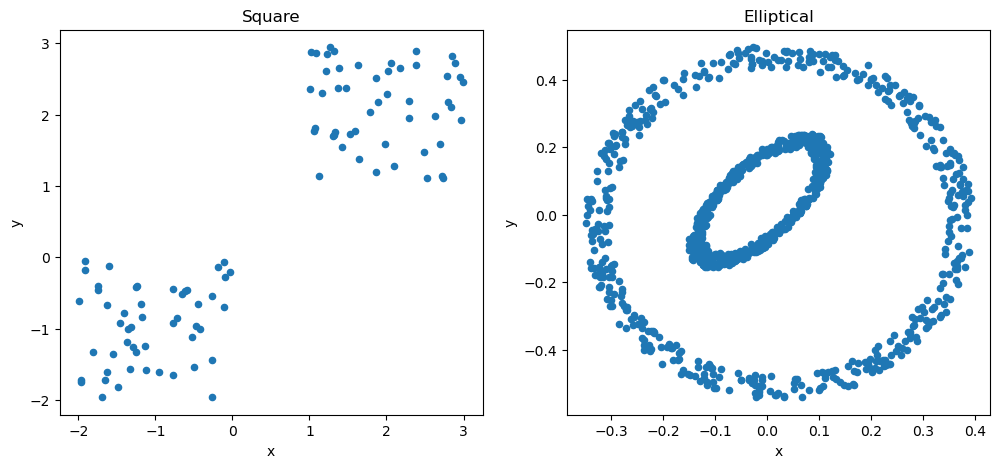

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
square_df.plot.scatter(x='x',y='y',ax=ax1)
ax1.set_title('Square')
elliptical_df.plot.scatter(x='x',y='y',ax=ax2)
ax2.set_title('Elliptical')

Text(0.5, 1.0, 'K-means Clustering')

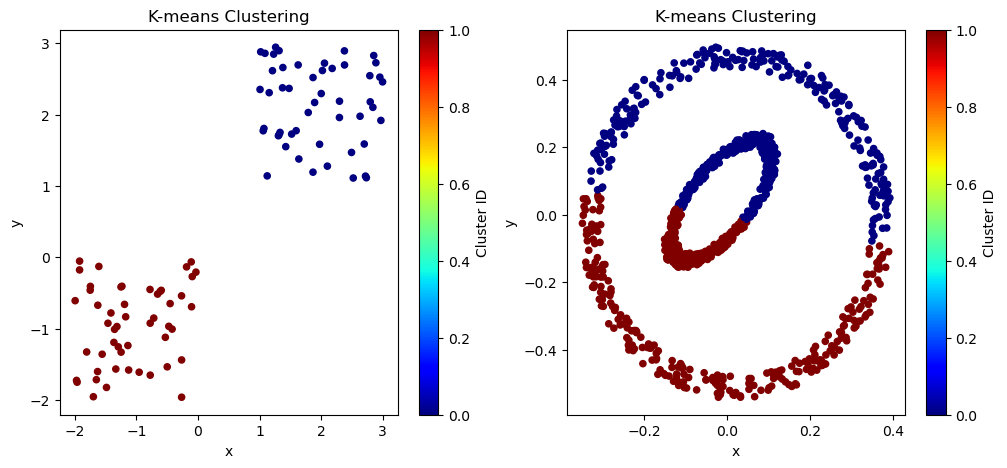

In [3]:
from sklearn import cluster
from lib.kmeans import Kmeans

k_means1 = Kmeans(2, square_df.to_numpy())
k_means1.run()
labels1 = k_means1.labels
result1 = pd.concat((square_df,pd.DataFrame(labels1, columns=['Cluster ID'])), axis=1)

k_means2 = Kmeans(2, elliptical_df.to_numpy())
k_means2.run()
labels2 = k_means2.labels
result2 = pd.concat((elliptical_df,pd.DataFrame(labels2, columns=['Cluster ID'])), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering')

In [4]:
import numpy as np

# Varying the centroids initialization
centroids_cases1 = []
centroids_cases2 = []
for i in range(20):
    centroids_cases1.append(square_df.sample(2).to_numpy())
    centroids_cases2.append(elliptical_df.sample(2).to_numpy())

print(centroids_cases1)
print(centroids_cases2)

[array([[-1.9915, -0.6066],
       [ 1.1568,  2.3068]]), array([[ 1.1568,  2.3068],
       [-1.4829, -1.8216]]), array([[1.0715, 1.8058],
       [1.2101, 2.6148]]), array([[-1.3134, -0.9687],
       [ 2.8534,  2.8274]]), array([[-0.654 , -0.5143],
       [ 2.7966,  2.1787]]), array([[-0.1081, -0.0634],
       [-1.7442, -0.4061]]), array([[-1.2915, -1.253 ],
       [-0.1081, -0.0634]]), array([[ 2.9525,  2.5246],
       [-1.7475, -0.4595]]), array([[-1.2459, -1.3272],
       [ 1.3731,  2.3752]]), array([[1.5215, 1.727 ],
       [1.5943, 1.7745]]), array([[-0.0317, -0.2066],
       [ 2.3792,  2.6951]]), array([[2.1009, 1.2778],
       [2.0015, 2.2948]]), array([[ 2.9525,  2.5246],
       [-0.7156, -0.8501]]), array([[-0.4505, -0.6474],
       [-1.1358, -1.2346]]), array([[1.1568, 2.3068],
       [2.5207, 1.1117]]), array([[-1.7475, -0.4595],
       [-0.654 , -0.5143]]), array([[-1.9689, -1.7229],
       [ 2.8395,  2.1016]]), array([[1.2101, 2.6148],
       [1.1247, 1.1414]]), array([[ 1.

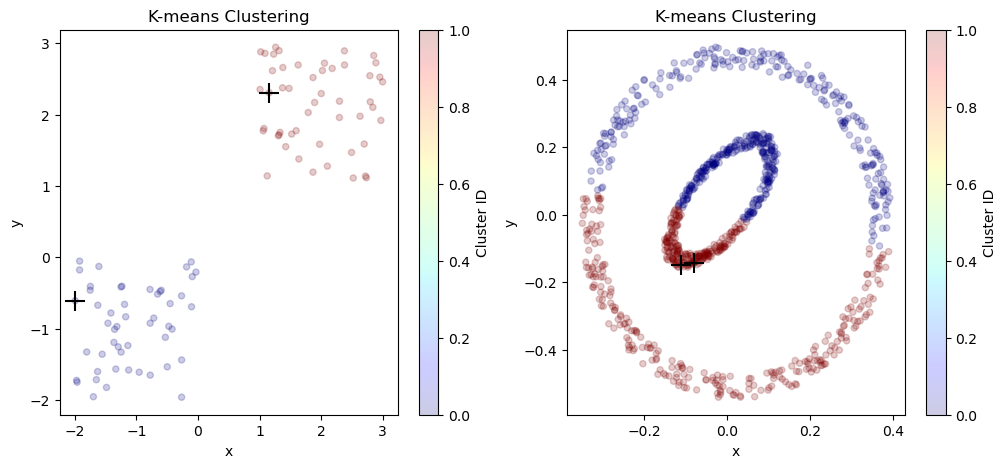

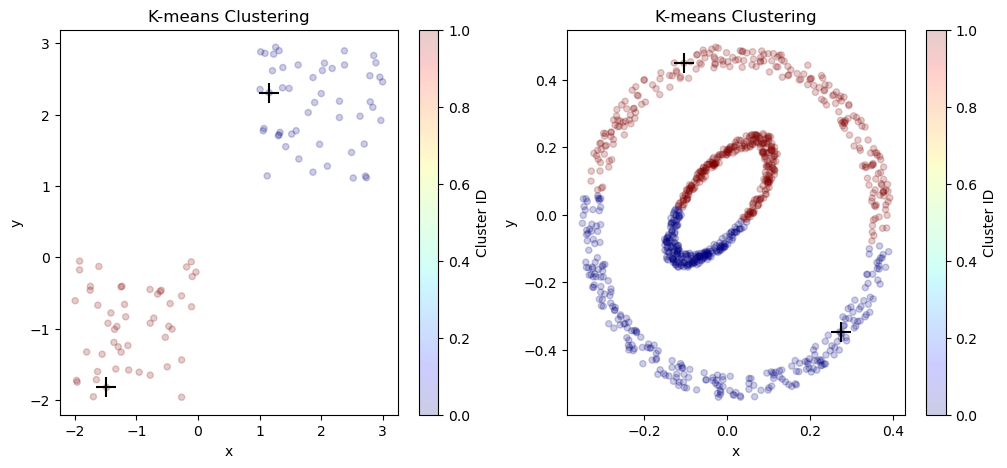

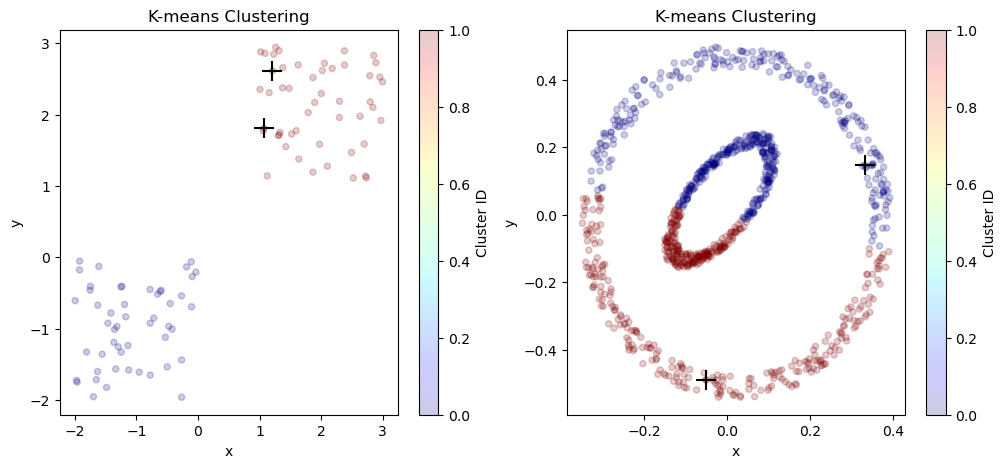

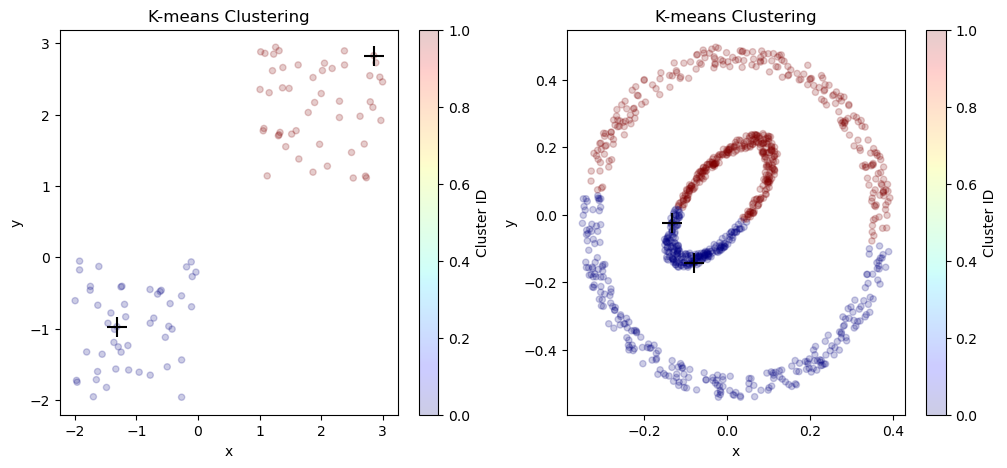

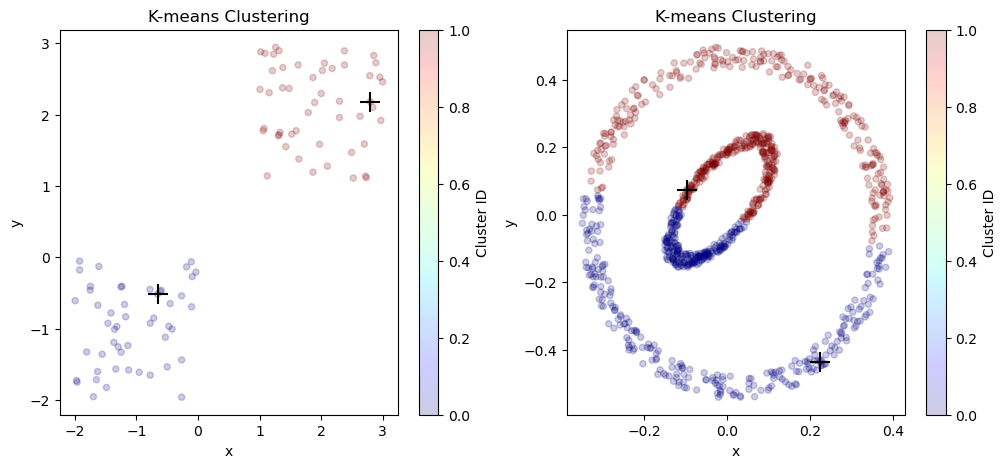

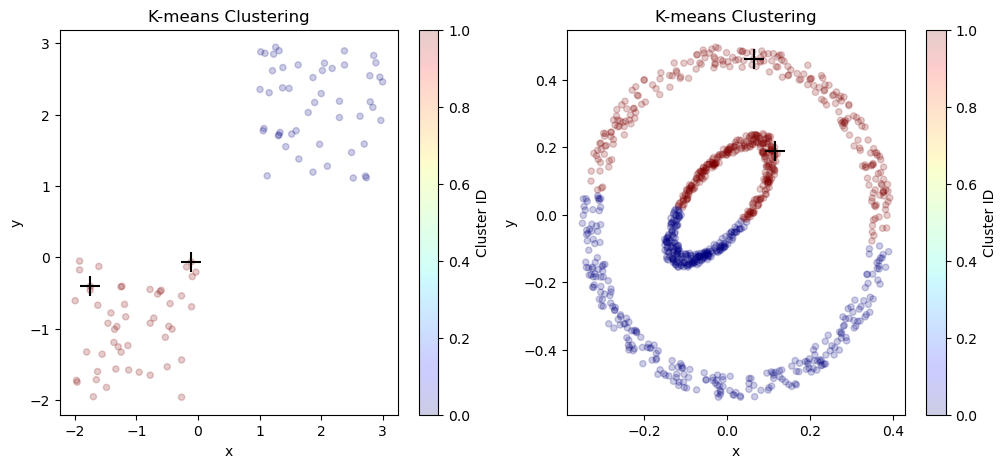

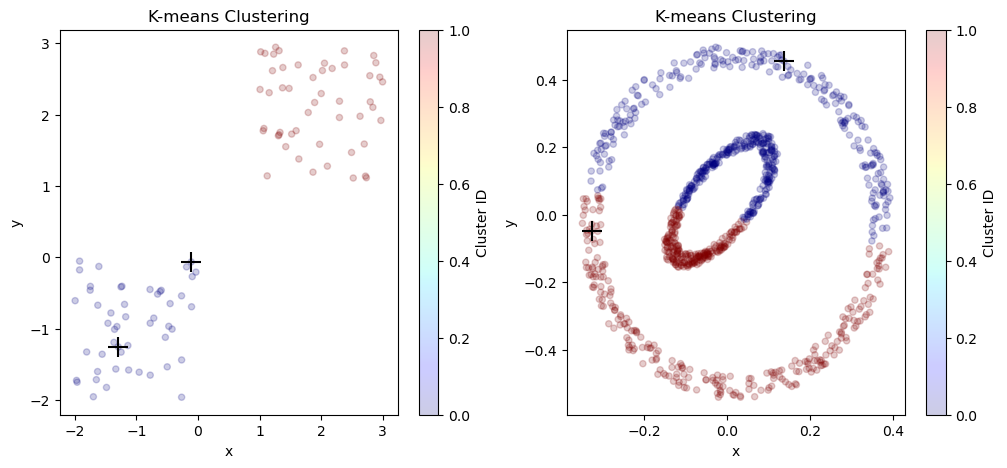

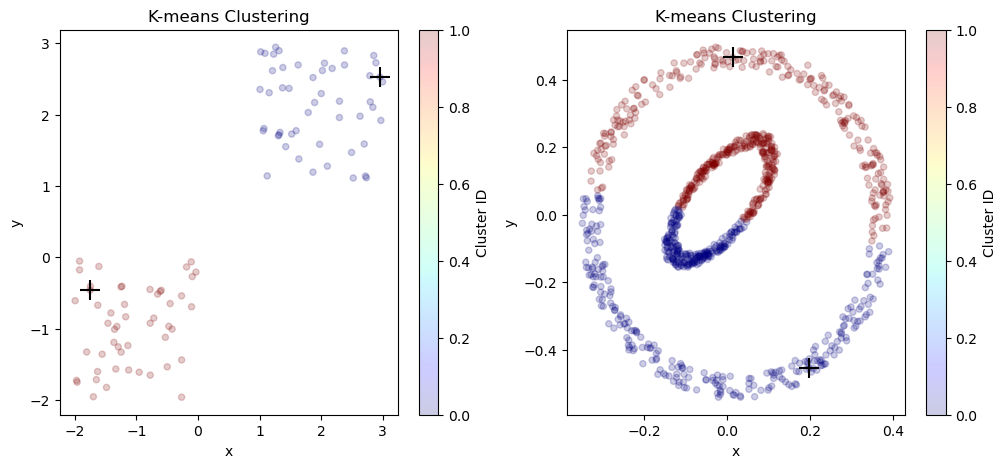

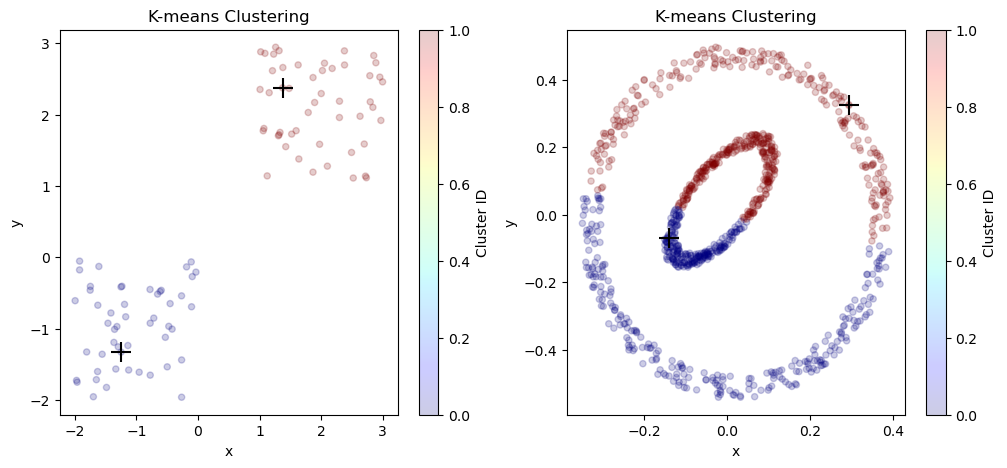

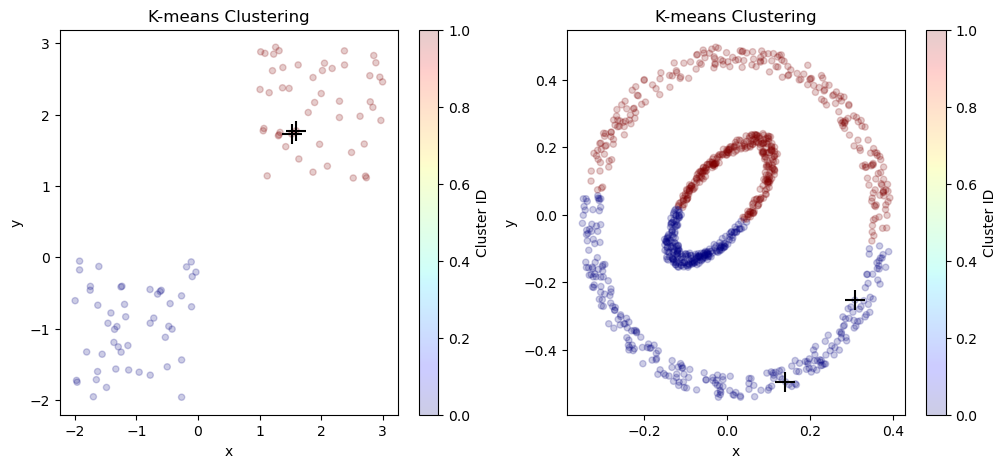

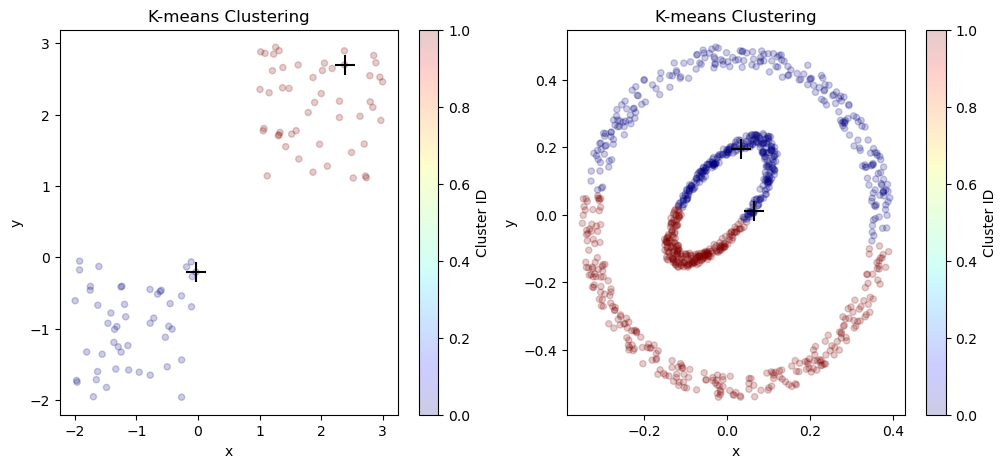

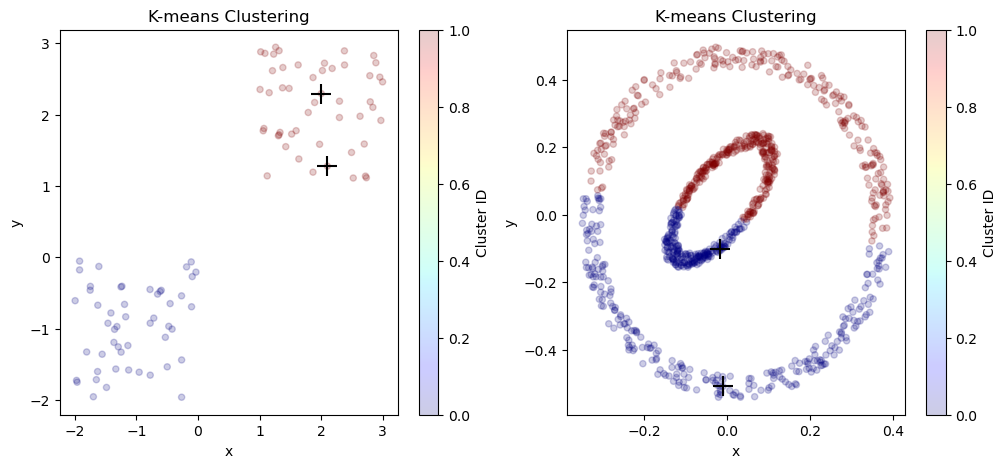

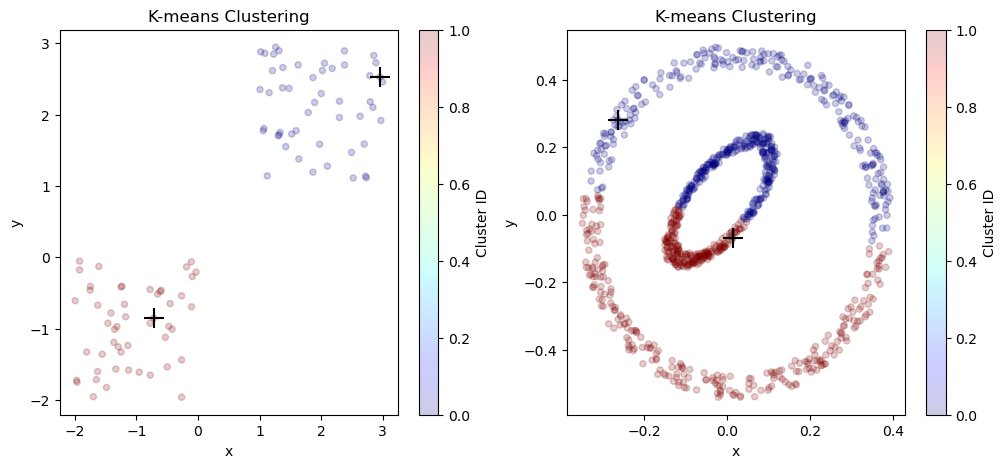

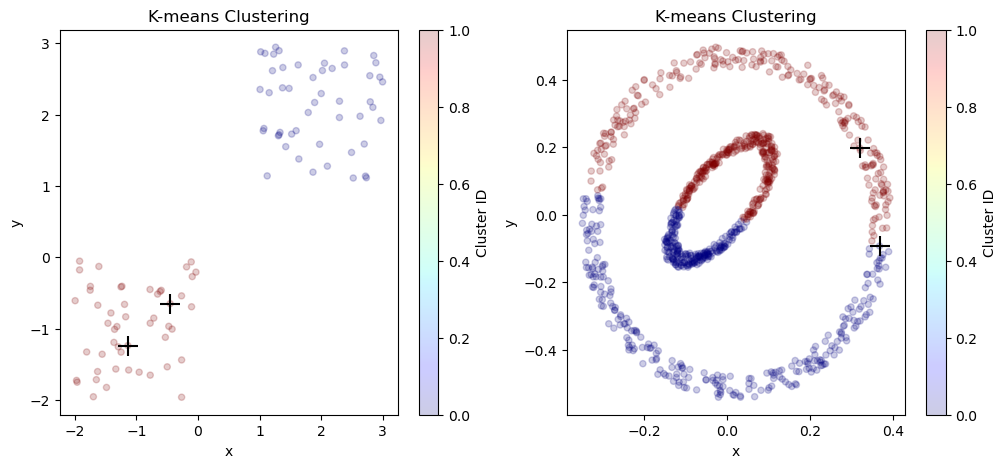

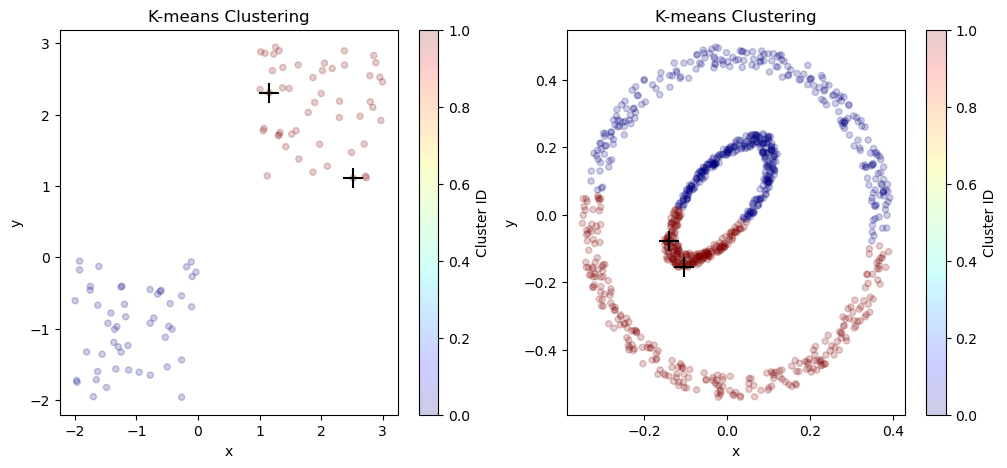

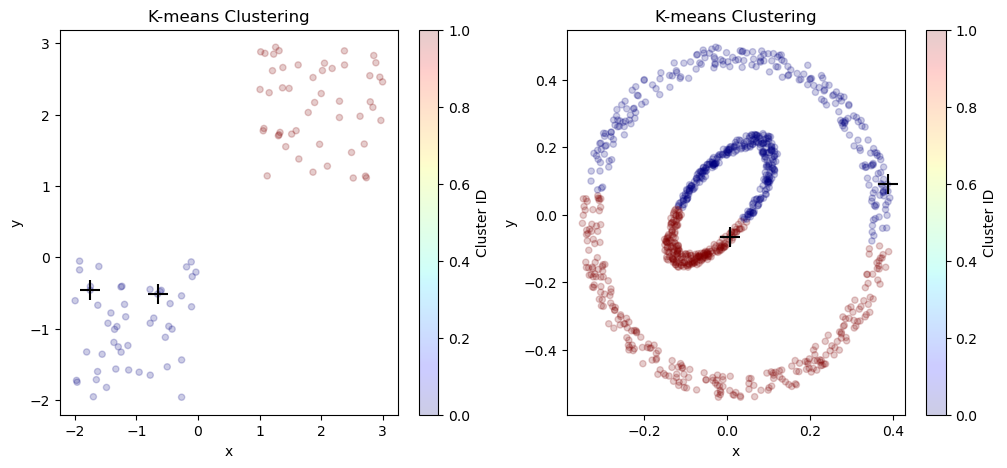

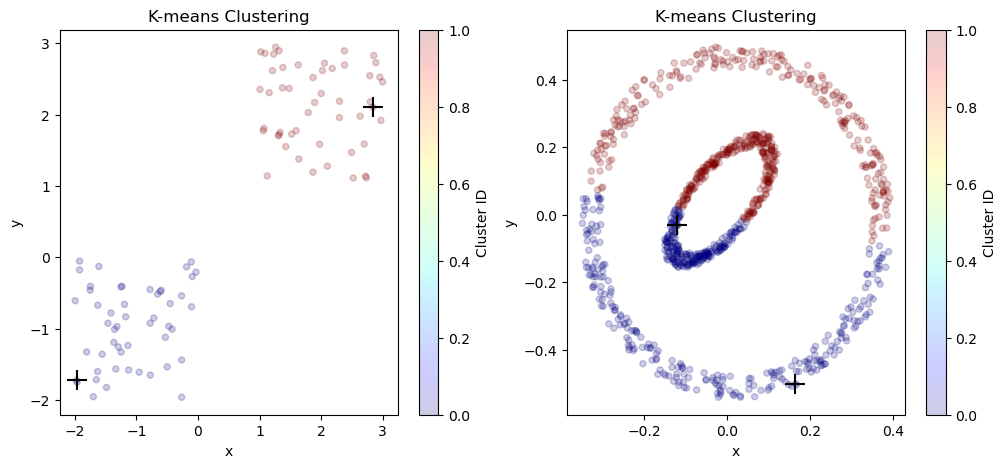

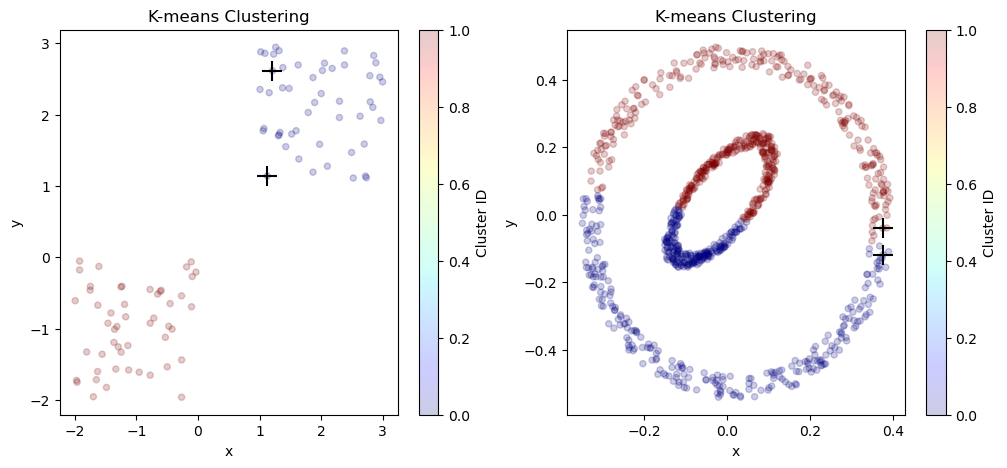

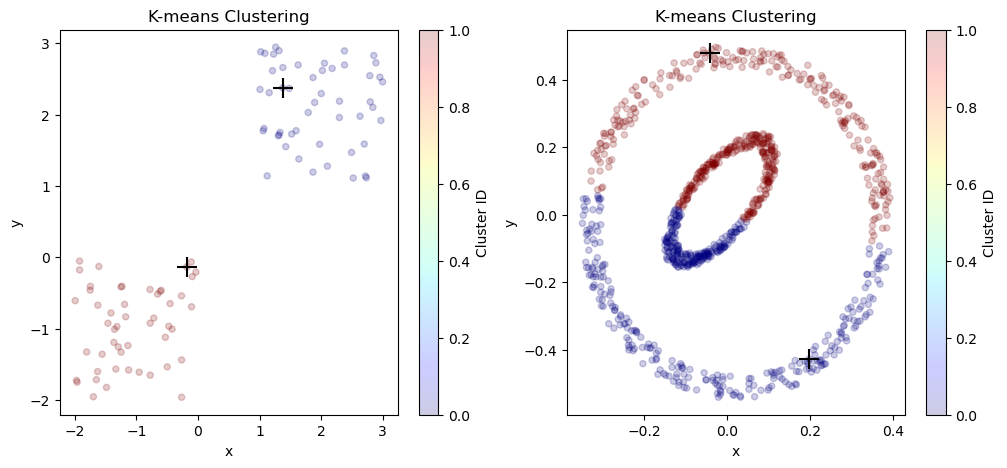

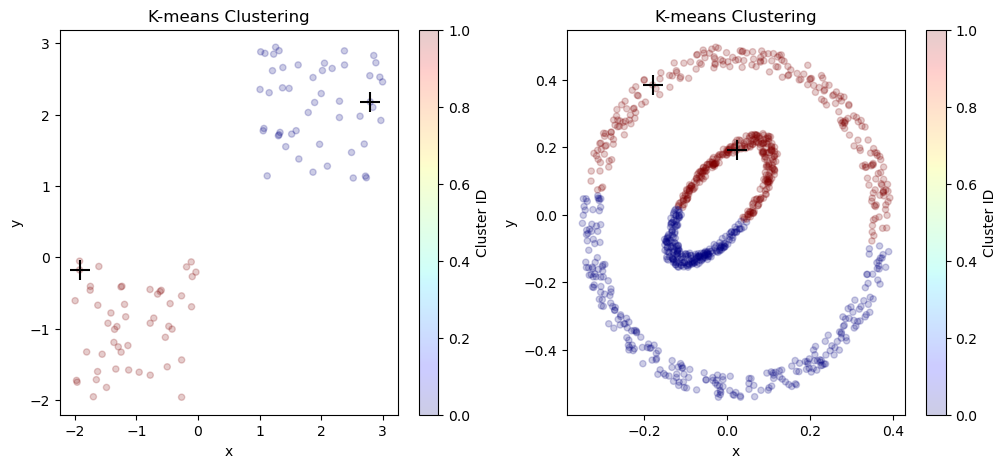

In [5]:
for i in range(20):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

    k_means1 = Kmeans(2, square_df.to_numpy())
    centroids1 = centroids_cases1[i].copy()
    k_means1.run(centroids1)
    labels1 = k_means1.labels
    result1 = pd.concat((square_df,pd.DataFrame(labels1, columns=['Cluster ID'])), axis=1)

    k_means2 = Kmeans(2, elliptical_df.to_numpy())
    centroids2 = centroids_cases2[i].copy()
    k_means2.run(centroids2)
    labels2 = k_means2.labels
    result2 = pd.concat((elliptical_df,pd.DataFrame(labels2, columns=['Cluster ID'])), axis=1)

    result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1, alpha=0.2)
    ax1.set_title('K-means Clustering')
    result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2, alpha=0.2)
    ax2.set_title('K-means Clustering')
    ax1.scatter(centroids_cases1[i][:,0], centroids_cases1[i][:,1], c='black', s=200, alpha=1, marker="+")
    ax2.scatter(centroids_cases2[i][:,0], centroids_cases2[i][:,1], c='black', s=200, alpha=1, marker="+")

In [6]:
# from sklearn import cluster
# import pandas as pd

# spectral = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='nearest_neighbors',n_neighbors=10)
# spectral.fit(square_df)
# labels1 = pd.DataFrame(spectral.labels_,columns=['Cluster ID'])
# result1 = pd.concat((square_df,labels1), axis=1)

# spectral2 = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='nearest_neighbors',n_neighbors=10)
# spectral2.fit(elliptical_df)
# labels2 = pd.DataFrame(spectral2.labels_,columns=['Cluster ID'])
# result2 = pd.concat((elliptical_df,labels2), axis=1)

# fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
# result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
# ax1.set_title('Spectral Clustering')
# result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
# ax2.set_title('Spectral Clustering')